# Imports

In [31]:
# -*- coding: utf8

from IPython.display import HTML
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [32]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [33]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Introdução

Ao longo do texto faremos uma análise de dados retirados do website IMDb<a href="#1">$^1$</a>, contendo majoritariamente informações sobre filmes e usuários da plataforma. Atualmente o IMDb é um serviço com uma série de utilidades, mas para o nosso propósito basta conhecer uma de suas principais finalidades: ele mantém um banco de dados constantemente atualizado com informações disponíveis sobre filmes, além disso, permite que usuários da plataforma interajam com essas informações. 
Dentre os dados disponíveis podemos encontrar o título, duração, gênero, orçamento, etc. de várias produções, informações sobre o elenco destes filmes também estão presentes. Usuários podem fazer análises, votar, avaliar e adicionar filmes em uma lista pessoal dentro da plataforma, essas informações, assim como dados de aspecto demográfico disponibilizados pelos usuários, também podem ser visualizados no IMDb.
Em dezembro de 2020, o IMDb possuía 560,232 filmes no catálogo<a href="#2">$^2$</a>. O dataset utilizado possui todos os filmes que haviam mais de cem votos até 01/01/2020, os dados estão separados em quatro arquivos da seguinte maneira:

* IMDb_movies.csv inclui 85,855 filmes
* IMDb_ratings.csv inclui avaliações dos usuários para os filmes no dataset
* IMDb_names.csv inclui informações sobre o elenco dos filmes no dataset
* IMDb_title_principals.csv inclui 835,513 papéis desempenhados dentro dos filmes no dataset 

Mais informações sobre o dataset podem ser encontradas em sua página no Kaggle<a href="#3">$^3$</a>.

---

Antes de iniciarmos qualquer análise tentaremos definir o significado dos nossos dados. Temos uma amostra de aproximadamente de 85,000 títulos retirados da população de filmes do IMDb, que é por sua vez uma amostra da população de todos os filmes lançados. Temos também uma amostra dos usuários da plataforma, que são também uma amostra da população de todas as pessoas que assistem filmes. Vale notar que seja qual for a população que queremos estudar a nossa amostra não possui aleatoriedade na escolha dos dados, os usuários de um serviço de catálogo e recomendação de conteúdo como o IMDb podem, por exemplo, representar um grupo de fãs do cinema, não representando bem as pessoas que assistem filmes em geral. Além disso, como descrito anteriormente, a amostra inclui filmes com mais de 100 votos dentro da plataforma, ou seja, o grupo de filmes mais populares entre os usuários do site. Dito isto, ainda assim iremos tratar os dados como uma amostra da população de filmes e de pessoas que os assistem.

As partes mais relevantes do conjunto de dados para a análise que faremos em seguida são as que relacionam os filmes com os usuários, em especial a nota média será uma métrica importante para tentar responder a questão: **As características do público e do próprio filme influenciam sua avaliação e popularidade?** 

---

1. <span id="1">https://www.imdb.com/</span>
2. <span id="2">https://www.imdb.com/pressroom/stats/</span>
3. <span id="3">https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv</span>


# Dataset

In [22]:
movies = pd.read_csv('datasets/IMDb_movies.csv')
movies.head()

/home/joao/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [23]:
names = pd.read_csv('datasets/IMDb_names.csv')
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [24]:
ratings = pd.read_csv('datasets/IMDb_ratings.csv')
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [25]:
title_principals = pd.read_csv('datasets/IMDb_title_principals.csv')
title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


# Caracterização

Iremos iniciar nosso estudo com testes para algumas hipóteses que devem ajudar a responder nossa pergunta. Para isso iremos explorar alguns dados de interesse e construir intervalos de confiança através de métodos adequados.

## Funções

In [26]:
def bootstrap_mean(df, column, n=5000, size=None):
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample = df[column].sample(size, replace=True)
        values[i] = sample.mean()
    return values

In [27]:
def bootstrap_diff(df1, df2, column, n=5000, size=None):
    if size is None:
        size = len(df1)
    values = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size, replace=True)
        sample2 = df2[column].sample(size, replace=True)
        values[i] = sample1.mean() - sample2.mean()
    return values

In [28]:
def ic_bootstrap(df, column, n=5000, size=None):
    values = bootstrap_mean(df, column, n, size)
    return (np.percentile(values, 2.5), np.percentile(values, 97.5))

## Testes de Hipóteses

### Teste 1

#### Checando intervalos de confiança com Bootstrap

Podemos analisar desse dataset o que de fato uma nota diz sobre um filme, analisando quão rara é tal nota quando tiramos a média de notas da população. Por exemplo, a partir disso, podemos formular a seguinte hipótese: uma nota média 8 diz pouco sobre a qualidade de um filme, já que ela é bem comum na base de dados. Tentaremos a partir daqui buscar evidências em dados que confirmem ou descartem essa ideia.

Uma maneira de testar essa hipótese é construir um intervalo de confiança utilizando a técnica de bootstrap, estratégia que será utilizada aqui.

In [29]:
result = bootstrap_mean(ratings,'mean_vote', 10000, 1000)
result

array([6.3009, 6.2014, 6.2659, ..., 6.184 , 6.2971, 6.2391])

Plotando o resultado - Note como o resultado obtido se aproxima de uma distribuição normal:

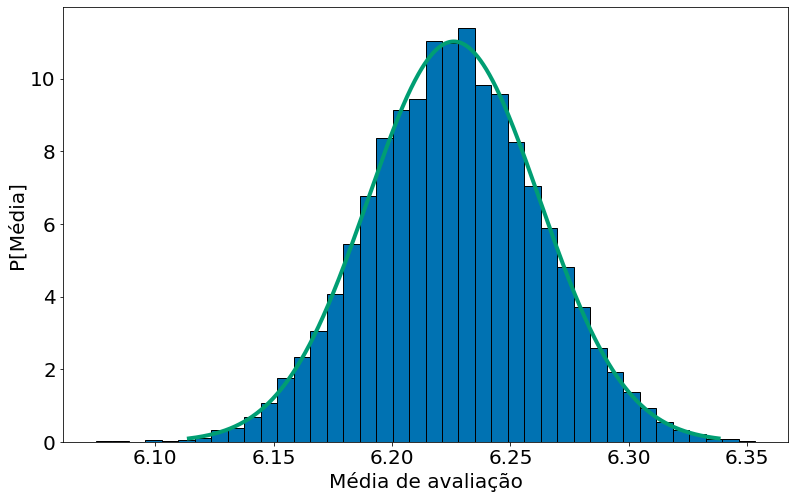

In [34]:
plt.figure(figsize=(13,8))
plt.hist(result, bins=40, edgecolor='k', density=True)
res = stats.norm(loc=result.mean(), scale=result.std())
res_np = np.linspace(res.ppf(0.001), res.ppf(0.999),10000)
plt.plot(res_np, res.pdf(res_np))
plt.xlabel('Média de avaliação')
plt.ylabel('P[Média]')
plt.show()

A maior concentração de valores se encontra entre 6.15 e 6.30, como mostrado abaixo:

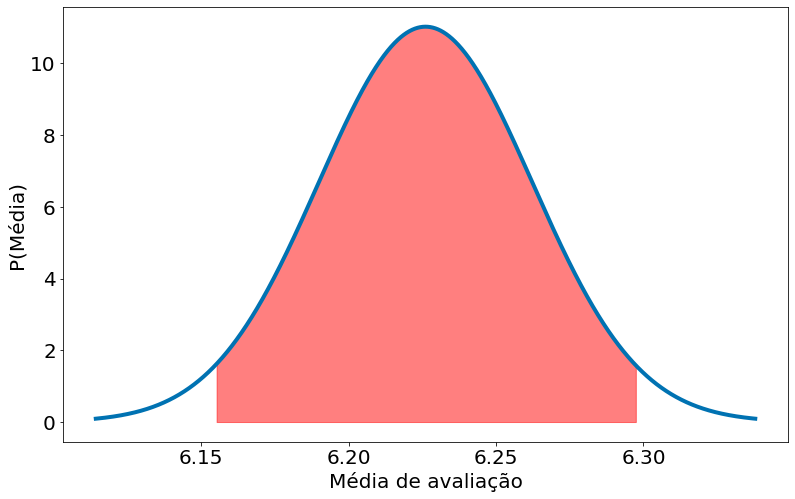

In [35]:
plt.figure(figsize=(13,8))
plt.plot(res_np, res.pdf(res_np))
filler = np.linspace(np.percentile(result, 2.5),np.percentile(result, 97.5))
plt.fill_between(filler, res.pdf(filler), color='r', alpha=0.5)
plt.xlabel('Média de avaliação')
plt.ylabel('P(Média)')
plt.show()

Como o valor apresentado na hipótese, 8, encontra-se fora dessa área, temos que ele é um valor de rara ocorrência e portanto, a hipótese é rejeitada, uma vez que um filme não apresenta média igual a ele frequentemente.

### Teste 2

Jovens (até 18 anos) tendem a dar notas mais altas que outras faixas etárias

#### Análise Exploratória

In [36]:
ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [37]:
faixas = ratings[['allgenders_0age_avg_vote', 'allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']].dropna()
faixas = faixas.reset_index(drop=True)
faixas

,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote
0,7.2,6.0,5.7,6.6
1,6.0,6.1,6.0,6.3
2,7.5,7.0,7.0,7.1
3,3.0,6.4,6.7,7.0
4,6.0,5.9,6.2,6.3
...,...,...,...,...
33331,4.0,5.7,5.6,5.3
33332,5.1,5.2,5.1,4.9
33333,9.3,8.6,8.1,6.8
33334,6.0,4.0,3.9,4.4


In [38]:
jovens = faixas['allgenders_0age_avg_vote'].to_frame(name="vals")
jovens.describe()

,vals
count,33336.000000
mean,6.195134
std,1.848898
min,1.000000
25%,5.000000
50%,6.000000
75%,7.200000
max,10.000000


In [39]:
geral = faixas[['allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote']].sum(axis=1).to_frame(name="vals")
geral /= 3
geral.describe()

,vals
count,33336.000000
mean,6.075230
std,1.164201
min,1.033333
25%,5.466667
50%,6.233333
75%,6.866667
max,9.766667


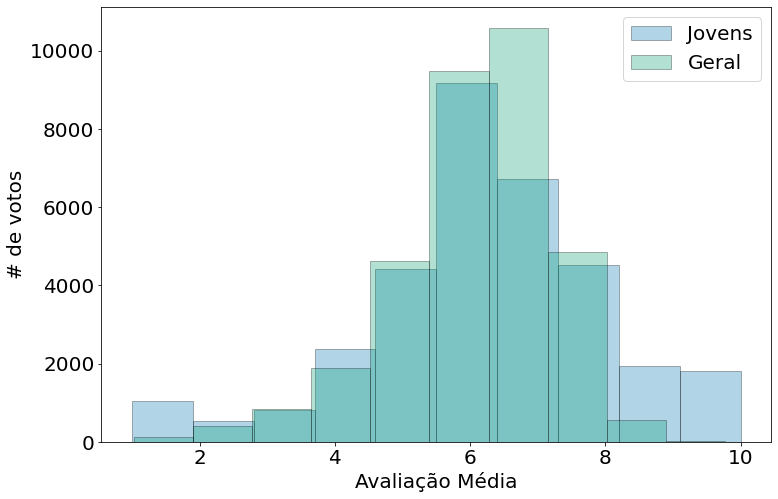

In [40]:
plt.hist(jovens['vals'], alpha=0.3, edgecolor='k', label='Jovens')
plt.hist(geral['vals'], alpha=0.3, edgecolor='k', label='Geral')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

#### Checando intervalos de confiança com Bootstrap

In [41]:
ic_bootstrap(jovens, 'vals')

(6.1751497630189585, 6.214954928605712)

In [42]:
ic_bootstrap(geral, 'vals')

(6.062526922846172, 6.0877725281977435)

In [43]:
diff = bootstrap_diff(jovens, geral, 'vals')

Text(0, 0.5, 'Freq')

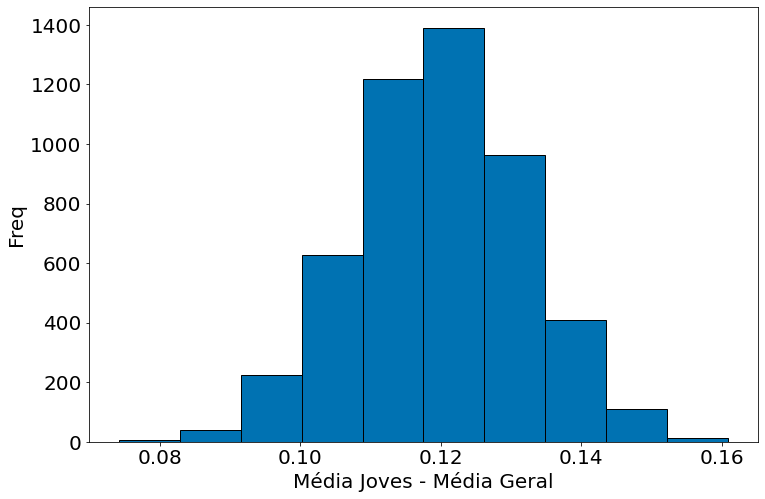

In [44]:
plt.hist(diff, edgecolor='k')
plt.xlabel('Média Joves - Média Geral')
plt.ylabel('Freq')

Podemos ver que o intervalo das médias não se cruzam e que o plot da diferença dos intervalos não contém o valor zero no eixo x, o que confirma nossa hipótese. Agora testaremos uma nova hipótese:


### Teste 3

Filmes produzidos nos EUA tendem a ter melhores avaliações.

#### Análise Exploratória

In [45]:
print(ratings.columns)
print()
print(movies.columns)

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [46]:
vc = pd.merge(ratings[['imdb_title_id', 'mean_vote']], movies[['imdb_title_id', 'country']], on='imdb_title_id')
vc

,imdb_title_id,mean_vote,country
0,tt0000009,5.9,USA
1,tt0000574,6.3,Australia
2,tt0001892,6.0,"Germany, Denmark"
3,tt0002101,5.3,USA
4,tt0002130,6.9,Italy
...,...,...,...
85850,tt9908390,5.5,"France, Belgium"
85851,tt9911196,7.9,Netherlands
85852,tt9911774,7.8,India
85853,tt9914286,9.4,Turkey


In [47]:
us = vc[vc['country'] == 'USA']
us.describe()

,mean_vote
count,28511.000000
mean,5.951036
std,1.189045
min,1.400000
25%,5.200000
50%,6.100000
75%,6.800000
max,9.700000


In [48]:
no_us = vc[vc['country'] != 'USA']
no_us.describe()

,mean_vote
count,57344.000000
mean,6.363222
std,1.113067
min,1.000000
25%,5.700000
50%,6.500000
75%,7.100000
max,9.800000


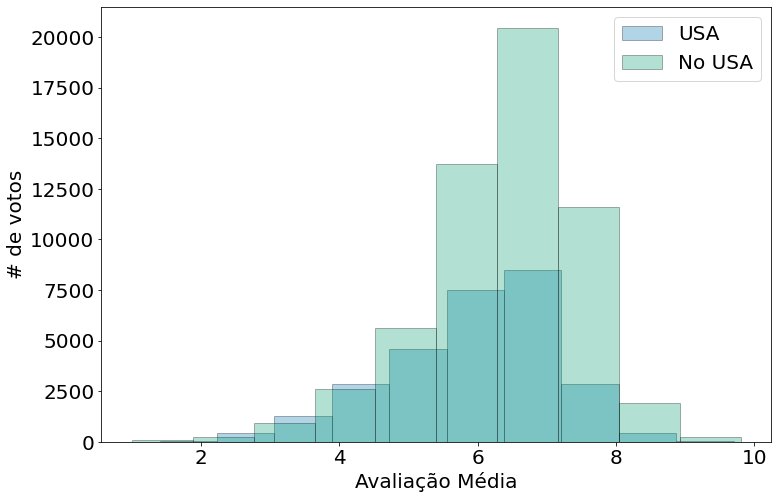

In [49]:
plt.hist(us['mean_vote'], alpha=0.3, edgecolor='k', label='USA')
plt.hist(no_us['mean_vote'], alpha=0.3, edgecolor='k', label='No USA')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

#### Checando intervalos de confiança com Bootstrap

In [50]:
ic_bootstrap(us, 'mean_vote')

(5.937676160078566, 5.964849970186944)

In [51]:
ic_bootstrap(no_us, 'mean_vote')

(6.354293561662947, 6.372459891183035)

In [52]:
samples_us = bootstrap_mean(us, 'mean_vote')
samples_no_us = bootstrap_mean(no_us, 'mean_vote')
to_plot = pd.DataFrame()
to_plot['USA'] = samples_us
to_plot['No USA'] = samples_no_us

Text(0, 0.5, 'Média')

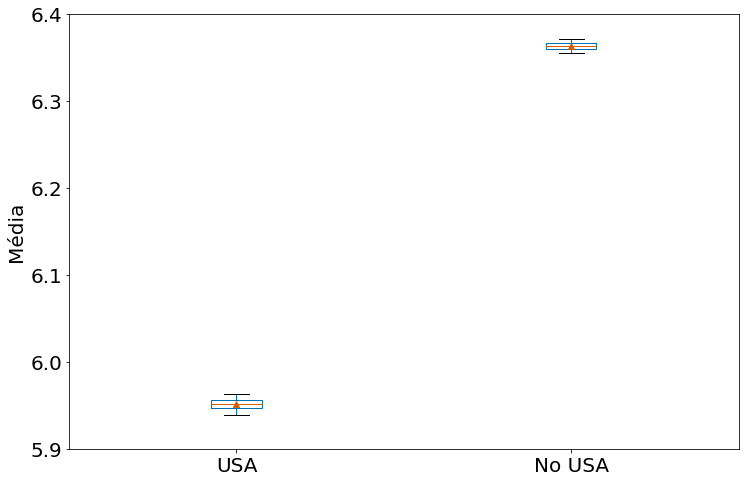

In [53]:
to_plot.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.ylim(5.9, 6.4)
plt.ylabel('Média')

O intervalo das médias não se cruzam, porém, a nota média dos filmes dos EUA é menor que a de produções de outros países, logo, rejeitamos nossa hipótese. Outra hipótese:

### Teste 4

Filmes que possuem 'Action' como um dos gêneros são mais populares

#### Análise Exploratória

In [55]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [56]:
gv = movies[['genre', 'votes']].dropna()
gv            

,genre,votes
0,Romance,154
1,"Biography, Crime, Drama",589
2,Drama,188
3,"Drama, History",446
4,"Adventure, Drama, Fantasy",2237
...,...,...
85850,Comedy,398
85851,"Comedy, Drama",724
85852,Drama,265
85853,"Drama, Family",194


In [57]:
action = gv[gv['genre'].str.contains("Action")]
action.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,votes
count,12948.00000
mean,20712.99985
std,87583.58916
min,100.00000
25%,251.00000
50%,734.00000
75%,3632.75000
max,2241615.00000


In [58]:
no_action = gv[~gv['genre'].str.contains("Action")]
no_action.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,votes
count,72907.00000
mean,7500.94817
std,44625.09056
min,99.00000
25%,199.00000
50%,455.00000
75%,1578.50000
max,2278845.00000


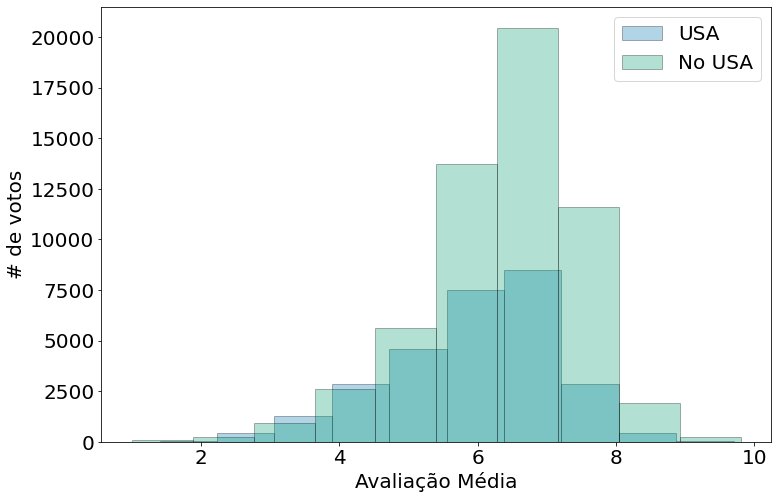

In [59]:
plt.hist(us['mean_vote'], alpha=0.3, edgecolor='k', label='USA')
plt.hist(no_us['mean_vote'], alpha=0.3, edgecolor='k', label='No USA')
plt.xlabel('Avaliação Média')
plt.ylabel('# de votos')
plt.legend()

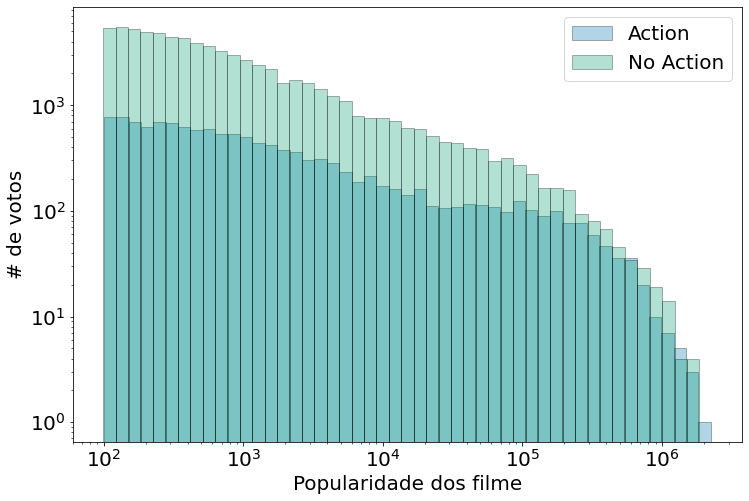

In [60]:
bins = np.logspace(np.log10(action['votes'].min()), np.log10(action['votes'].max()))
plt.hist(action['votes'], bins=bins, alpha=0.3, edgecolor='k', label='Action')
bins = np.logspace(np.log10(no_action['votes'].min()), np.log10(no_action['votes'].max()))
plt.hist(no_action['votes'], bins=bins, alpha=0.3, edgecolor='k', label='No Action')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Popularidade dos filme')
plt.ylabel('# de votos')
plt.legend()

#### Checando intervalos de confiança com Bootstrap

In [61]:
ic_bootstrap(action, 'votes')

(19320.718591674387, 22254.378826845845)

In [62]:
ic_bootstrap(no_action, 'votes')

(7189.593261278067, 7834.175322328445)

In [63]:
diff = bootstrap_diff(action, no_action, 'votes')

Text(0, 0.5, 'Freq')

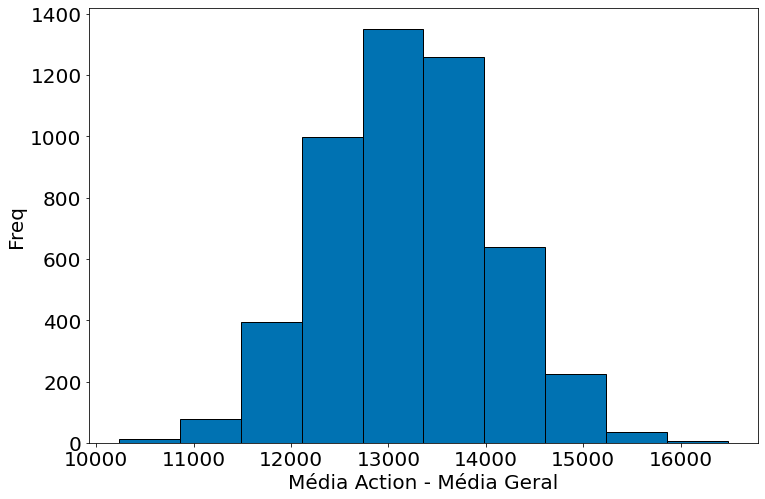

In [64]:
plt.hist(diff, edgecolor='k')
plt.xlabel('Média Action - Média Geral')
plt.ylabel('Freq')

O intervalo das médias não se cruzam, filmes de ação recebem em média milhares de votos a mais do que produções sem esse gênero, confirmamos a hipótese.